Scipy is something we can use if we want to. It is just a regular IVP solver tho. Does practically the same thing that the matlab code does. Would be easy to convert the current matlab code to python.

In [3]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

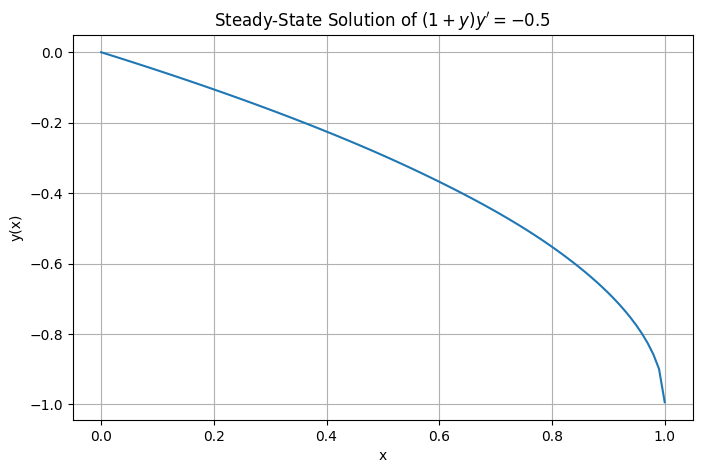

In [7]:
# Define the ODE
def ode(x, y):
    return -0.5 / (1 + y)  # dy/dx = -0.5/(1 + y)

# Initial condition (y(0) = y0)
y0 = 0.0  # You may need to adjust this based on your problem

# Spatial domain
x_span = [0, 1]  # From x=0 to x=1
x_eval = np.linspace(0, 1, 100)  # Points where to evaluate solution

# Solve the ODE
sol = solve_ivp(ode, x_span, [y0], t_eval=x_eval)

# Plot the solution
plt.figure(figsize=(8, 5))
plt.plot(sol.t, sol.y[0])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Steady-State Solution of $(1+y)y\' = -0.5$')
plt.grid(True)
plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Alexa\AppData\Local\Temp\ipykernel_4352\2768196014.py:26: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Solution of $\partial_t y = (1+y)\partial_x y + 0.5$')


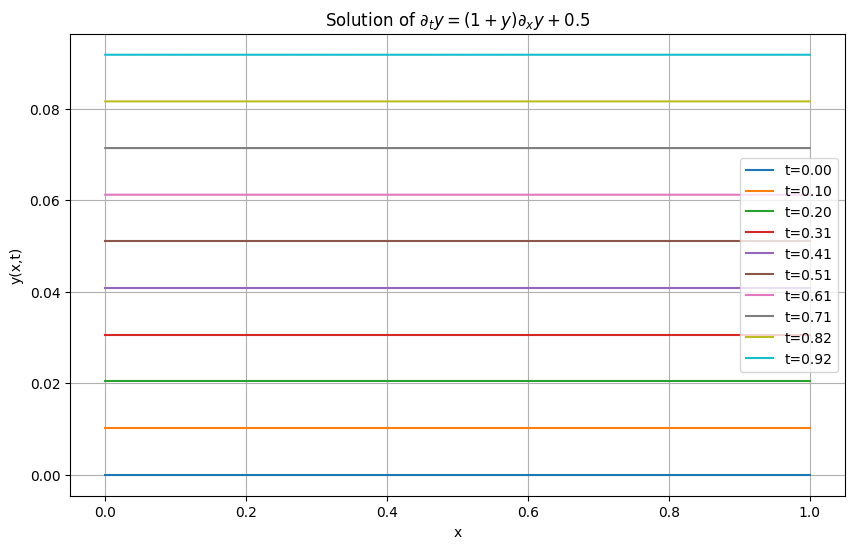

In [6]:
# Parameters
L = 1.0           # Domain length
nx = 100          # Spatial points
nt = 50           # Output time points
dx = L / (nx - 1) # Spatial step
x = np.linspace(0, L, nx)  # Spatial grid

# PDE definition
def pde(t, y):
    dydx = np.gradient(y, x)  # Spatial derivative
    return (1 + y) * dydx + 0.5

# Initial condition
y0 = np.zeros(nx)

# Solve
sol = solve_ivp(pde, [0, 1], y0, t_eval=np.linspace(0, 1, nt))

# Plotting
plt.figure(figsize=(10, 6))
for i, t in enumerate(sol.t[::5]):  # Plot every 5th time step
    plt.plot(x, sol.y[:, i], label=f't={t:.2f}')

plt.xlabel('x')
plt.ylabel('y(x,t)')
plt.title('Solution of $\partial_t y = (1+y)\partial_x y + 0.5$')
plt.legend()
plt.grid(True)
plt.show()